In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML WOC/Data Sets/linear/linear_regression_train.csv'
data = pd.read_csv(path)
from matplotlib.animation import FuncAnimation
from matplotlib import style
style.use('fivethirtyeight')

Mounted at /content/drive


In [3]:
feature_cols = [f"Feature_{i}" for i in range(1,26)]
# print(feature_cols)
X = data[feature_cols].to_numpy()
Y = data[['Target']].to_numpy()
X_cols_mean = np.mean(X, axis = 0)
X_cols_std = np.std(X,axis = 0)
X = (X - X_cols_mean)/X_cols_std
print(X.shape)
print(Y.shape)

(48000, 25)
(48000, 1)


In [ ]:
# w = np.zeros((1,25))
# b = np.zeros((1,1))
# w = np.random.rand(1, 25)
# b = np.random.rand(1,1)
w = np.random.uniform(-1, 1, (1, 25))
b = np.random.uniform(-1, 1, (1, 1))

In [ ]:
# def compute_cost(x,y,w,b):
#   cost = 0.0
#   m = x.shape[0]
#   for i in range(m):
#     f_wb = np.dot(x[i],w) + b
#     cost = cost + (f_wb - y[i])**2
#   cost = cost/(2*m)
#   return cost

def compute_cost(x,y,w,b):
  predictions = np.dot(x,w.T) + b
  # predictions = np.sum(x*w, axis = 1) + b #This approach is slower than above approach
  cost = np.mean((predictions - y)**2) / 2
  return cost

In [ ]:
def compute_gradient(x,y,w,b):
  dj_dw = np.zeros_like(w)
  dj_db = 0.0
  predictions = np.dot(x,w.T) + b
  err = predictions - y
  dj_dw = np.mean(err * x, axis = 0)
  dj_db = np.mean(err)
  return dj_dw, dj_db

In [ ]:
def gradient_descent(x,y,w,b, cost_func, grad_func, alpha, num_of_iters):
  J_history = []
  for i in range(num_of_iters):
    dj_dw, dj_db = grad_func(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    J_history.append(cost_func(x,y,w,b))
    if i % ((num_of_iters + 9) // 10) == 0:
      print(f"Iteration: {i:4d}, Cost {cost_func(x,y,w,b)}, w:{w}, b={b}")
  return w, b, J_history

In [ ]:
print(compute_cost(x_train, y_train, w, b))

3101983.336982868


In [ ]:
# alpha = 3e-5
# num_of_iters = 1000
# batch_size = 1000
# epochs = 10
# J_history = {}
# for epoch in range(epochs):
#   print("epoch ",epoch+1)
#   indices = np.arange(x_train.shape[0])
#   np.random.shuffle(indices)
#   x_train_shuffled = x_train[indices]
#   y_train_shuffled = y_train[indices]
#   for i in range(0,x_train.shape[0], batch_size):
#     # print(f"The value of i is {i}")
#     print(f"Batch number {i/batch_size} in epoch {epoch+1}")
#     x_batch = x_train_shuffled[i:i+batch_size]
#     y_batch = y_train_shuffled[i:i+batch_size]
#     w, b, J_history[f"J_history_{epoch}"] = gradient_descent(x_batch, y_batch, w, b, compute_cost, compute_gradient, alpha, num_of_iters)
# print(w)
# print(b)

Streaming output truncated to the last 5000 lines.
   1.07518225e+00]], b=[[1246.77220197]]
Iteration:  400, Cost 58973.64993224363, w:[[ 1.30455219e+02  2.39346976e-01  5.23155170e+02  7.33955695e+02
   3.38731079e-01  8.12003356e+02  4.41552768e+02 -1.46923029e+00
   6.46527533e+02  2.25906179e+02 -5.64672205e-01  1.07372197e+00
   7.60675275e+02  6.62153438e+02  3.06471974e-01  5.28269075e+02
   3.23855682e+01  4.53208368e+02  4.11866214e+02  6.94105262e+02
   9.74406879e+01  1.55759510e+00  1.05894170e+02  4.91350642e+02
   1.17406998e+00]], b=[[1246.82698197]]
Iteration:  600, Cost 58955.615758394706, w:[[ 1.30420238e+02  3.36244899e-01  5.23069504e+02  7.33827274e+02
   3.80045370e-01  8.12068782e+02  4.41564125e+02 -1.48626846e+00
   6.46460285e+02  2.25802849e+02 -5.63367568e-01  9.93640680e-01
   7.60733819e+02  6.62098064e+02  3.16931198e-01  5.28216352e+02
   3.23505861e+01  4.53299412e+02  4.11882528e+02  6.94127136e+02
   9.74293111e+01  1.57889472e+00  1.05784407e+02  4.9

Iteration:    0, Cost 3083851.973879863, w:[[ 0.74174     0.69298068  1.49107703  3.05404682 -0.00451429  1.73199502
   0.51819451 -0.04915855  2.54807606  0.39232067 -0.30796215 -0.08159998
   2.28168312  1.85399866 -0.54332836  2.25762753 -0.38135626  0.95305515
   1.05796346  2.27547008 -0.10958028 -0.73363082 -0.02278364  2.12931734
  -1.00070375]], b=[[4.34654029]]
Iteration:  500, Cost 210834.79842269694, w:[[ 9.73557755e+01  5.69635498e+00  4.04871146e+02  5.67455777e+02
   6.18103936e-01  6.32500624e+02  3.46167537e+02  2.95672832e+00
   5.01162999e+02  1.77077355e+02  1.68536501e+00  2.94850887e+00
   5.87101607e+02  5.12835701e+02 -3.44559624e+00  4.08735880e+02
   2.00056357e+01  3.52423234e+02  3.19895054e+02  5.38585883e+02
   6.89332601e+01 -2.61066248e+00  8.21275194e+01  3.83580241e+02
  -1.19290294e+00]], b=[[970.33442348]]
Iteration: 1000, Cost 65765.42493889011, w:[[ 1.22114976e+02  2.89669243e+00  4.96013269e+02  6.96857183e+02
  -1.66068377e-02  7.71743474e+02  4.2

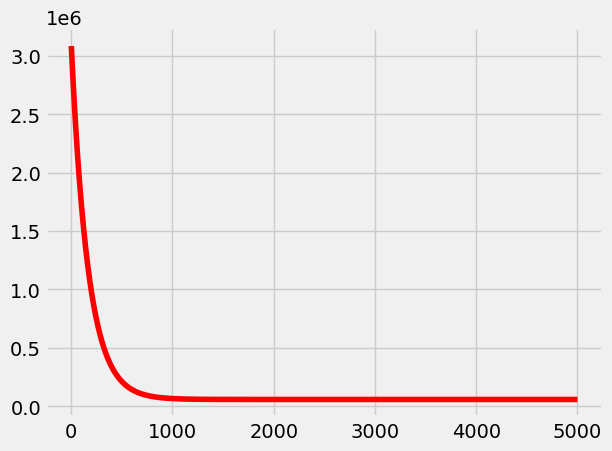

In [ ]:
alpha = 3e-3
num_of_iters = 5000
w_wo_reg, b_wo_reg, J_history_wo_reg = gradient_descent(x_train, y_train, w, b, compute_cost, compute_gradient, alpha, num_of_iters)
print(w_wo_reg)
print(b_wo_reg)
plt.plot(np.arange(1,num_of_iters+1), J_history_wo_reg, color = 'red')

In [ ]:
def compute_cost_regularized(x,y,w,b, reg_param):
  predictions = np.dot(x,w.T) + b
  # predictions = np.sum(x*w, axis = 1) + b #This approach is slower than above approach
  cost = np.mean((predictions - y)**2) / 2
  cost += (reg_param*np.mean(w**2))/2
  return cost

In [ ]:
def gradient_descent_reg(x,y,w,b,cost_func_reg,grad_func,alpha,num_of_iters, reg_param):
  J_history = []
  for i in range(num_of_iters):
    dj_dw, dj_db = grad_func(x,y,w,b)
    # w = w - alpha * dj_dw
    w = w*(1-alpha*reg_param/x.shape[0]) - alpha * dj_dw
    b = b - alpha * dj_db
    J_history.append(cost_func_reg(x,y,w,b,reg_param))
    if i % ((num_of_iters + 9) // 10) == 0:
      print(f"Iteration: {i:4d}, Cost: {cost_func_reg(x,y,w,b,reg_param)}, w:{w}, b={b}")
  return w, b, J_history

Iteration:    0, Cost: 3094840.234664384, w:[[-0.78110363  0.49056896  1.17523058  1.36094722 -0.42995568  1.22246239
   0.68262589  0.18324654  1.0256221   0.75935819  0.1213972   0.69003333
   1.3109586   0.43232878 -0.28826536  1.11447153 -0.6156685  -0.49209665
   0.18811848  0.92430529  1.00576813  0.9436547   0.14663657  1.34096347
   0.12703249]], b=[[1.36425035]]
Iteration: 1000, Cost: 491770.5697158094, w:[[ 77.57755919   6.1265245  329.01792687 460.12797624   0.65517831
  515.06736056 282.42023265   3.57550047 406.82006576 144.78804436
    1.8121674    3.44070488 475.97202464 416.27230599  -3.40354303
  331.95123348  14.82610788 286.52765398 259.7970717  437.47590181
   54.66008723  -2.61652455  66.94920298 312.30830436  -1.2173402 ]], b=[[788.97199453]]
Iteration: 2000, Cost: 149008.66421993967, w:[[ 1.09275781e+02  4.70591436e+00  4.50691479e+02  6.32151624e+02
   3.27046237e-01  7.02891995e+02  3.84354558e+02  2.17766072e+00
   5.57794198e+02  1.96412976e+02  1.61558626e+0

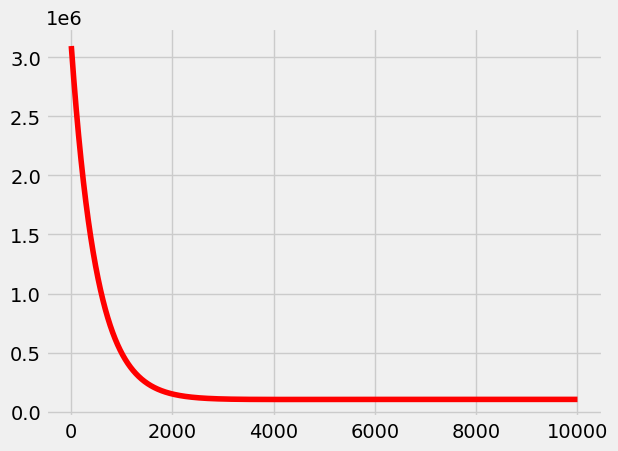

In [ ]:
alpha = 1e-3
num_of_iters = 10000
reg_param = 0.5
w = np.random.uniform(-1, 1, (1, 25))
b = np.random.uniform(-1, 1, (1, 1))
w_w_reg, b_w_reg, J_history_w_reg = gradient_descent_reg(x_train, y_train, w, b, compute_cost_regularized, compute_gradient, alpha, num_of_iters, reg_param)
print(w_w_reg)
print(b_w_reg)
plt.plot(np.arange(1,num_of_iters+1), J_history_w_reg, color = 'red')

In [ ]:
print(compute_cost(x_train,y_train,w_w_reg,b_w_reg))

58027.41025681476


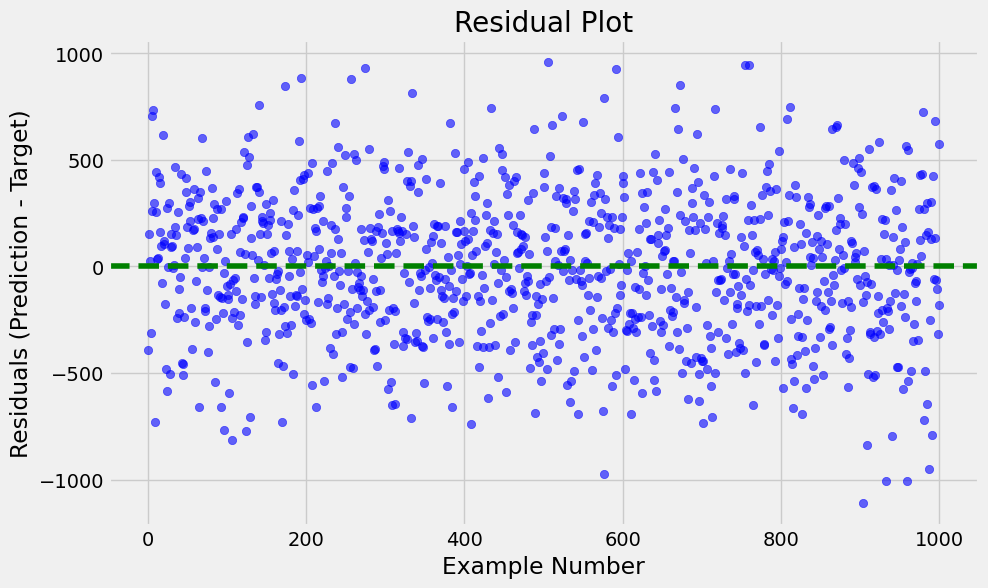

In [ ]:

predictions = np.dot(x_train, w_w_reg.T) + b_w_reg
residuals = predictions - y_train

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(1, 1001), residuals[0:1000], color='blue', alpha=0.6)
plt.axhline(0, color='green', linestyle='--')  # Line at 0 to indicate no residual error
plt.xlabel('Example Number')
plt.ylabel('Residuals (Prediction - Target)')
plt.title('Residual Plot')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100, alpha=0.6, label='Target', color='blue')
plt.hist(predictions, bins=100, alpha=0.6, label='Prediction', color='red')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target and Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# Still working on below:

# def gradient_descent_reg_interactive(x, y, w, b, cost_func_reg, grad_func, alpha, num_of_iters, reg_param):
#     J_history = []

#     # Set up the plot for real-time updates
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.set_xlabel('Iterations')
#     ax.set_ylabel('Cost')
#     ax.set_title('Learning Curve (Real-time)')

#     # Initialize the plot with empty data
#     line, = ax.plot([], [], color='red')
#     plt.ion()

#     # Display the plot first
#     plt.show(block=False)

#     for i in range(num_of_iters):
#         # Compute gradients
#         dj_dw, dj_db = grad_func(x, y, w, b)

#         # Update weights and bias
#         w = w * (1 - alpha * reg_param / x.shape[0]) - alpha * dj_dw
#         b = b - alpha * dj_db

#         # Compute cost
#         cost = cost_func_reg(x, y, w, b, reg_param)
#         J_history.append(cost)

#         # Update the plot every 1% of the iterations (adjust as necessary)
#         if i % ((num_of_iters + 9) // 10) == 0:
#             line.set_xdata(range(1, len(J_history) + 1))
#             line.set_ydata(J_history)
#             ax.relim()  # Recalculate axis limits
#             ax.autoscale_view()  # Update the view to include the new data
#             plt.draw()  # Redraw the plot
#             plt.pause(0.1)  # Pause to update the plot (adjust time for smoother updates)

#         # Print the progress every 10% of the iterations (adjust as needed)
#         if i % ((num_of_iters + 9) // 10) == 0:
#             print(f"Iteration: {i:4d}, Cost: {cost:.6f}")

#     # Finalize the plot
#     plt.ioff()  # Turn off interactive mode
#     plt.show()  # Show the final plot after the loop ends

#     return w, b, J_history

In [ ]:
# Testing:

In [ ]:
path2 = '/content/drive/MyDrive/ML WOC/Data Sets/linear/linear_regression_test.csv'
data_test= pd.read_csv(path2)
feature_cols_test = [f"Feature_{i}" for i in range(1,26)]
# print(feature_cols)
x_test = data_test[feature_cols].to_numpy()
x_test_cols_mean = np.mean(x_train, axis = 0)
x_test_cols_std = np.std(x_train,axis = 0)
x_test = (x_test - x_test_cols_mean)/x_test_cols_std
print(x_test.shape)

(12000, 25)


In [ ]:
Test_Predictions = np.dot(x_test, w_w_reg.T) + b_w_reg

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing.data
Y = housing.target
print(X.head())
print(Y.head())
X = X.to_numpy()
Y = Y.to_numpy()
X_cols_mean = np.mean(X,axis = 0)
X_cols_std = np.std(X,axis = 0)
X = (X - X_cols_mean)/X_cols_std
print(X.shape)
print(Y.shape)
indxs = np.random.permutation(X.shape[0])
X = X[indxs,:]
Y = Y[indxs]
x_train = X[:15000,:]
y_train = Y[:15000]
x_test = X[15000:,:]
y_test = Y[15000:]

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
(20640, 8)
(20640,)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self,inp_features, alpha=1e-3, reg_param=None, batch_size=32,epochs=100):
        self.epochs = epochs
        self.inp_features = inp_features
        self.alpha = alpha
        self.reg_param = reg_param
        self.cost_func = self._compute_cost if self.reg_param is None else self._compute_cost_reg
        self.W = None
        self.B = None
        self._init_params()
        self.batch_size = batch_size
    def _init_params(self):
        self.W = np.random.randn(1,self.inp_features)
        self.B = 0.0
    def _compute_cost(self,X,Y):
        m = X.shape[0]
        predictions = self.predict(X)
        cost = np.mean((predictions - Y)**2) / 2
        return cost
    def _compute_cost_reg(self, X, Y):
        m = X.shape[0]
        predictions = self.predict(X)
        cost = np.mean((predictions - Y)**2) / 2
        cost += (self.reg_param*np.sum(self.W**2))/(2*m)
        return cost
    def _get_grads(self,X,Y):
        predictions = self.predict(X)
        err = predictions - Y
        dj_dw = np.mean(err * X, axis = 0)
        dj_dw = dj_dw.reshape(self.W.shape)
        dj_db = np.mean(err)
        return dj_dw, dj_db
    def train(self,X,Y,details=True,plot_costs=True):
        m = X.shape[0]
        Y = Y.reshape((m,1))
        J_history_batches = []
        J_history_entire = []
        for epoch in range(1,self.epochs+1):
            indxs = np.random.permutation(m)
            X_shuffled = X[indxs,:]
            Y_shuffled = Y[indxs,:]
            batches = m // self.batch_size
            for k in range(batches):
                mini_batch_X = X_shuffled[k*self.batch_size:(k+1)*self.batch_size,:]
                mini_batch_Y = Y_shuffled[k*self.batch_size: (k+1)*self.batch_size,:]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                # cost = self._compute_cost(mini_batch_X, mini_batch_Y) if self.reg_param is None else self._compute_cost_reg(mini_batch_X, mini_batch_Y)
                cost = self.cost_func(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: {k+1}/{batches}, Cost: {cost:.6f}")

            if m%batches != 0:
                mini_batch_X = X_shuffled[batches*self.batch_size:,:]
                mini_batch_Y = Y_shuffled[batches*self.batch_size]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                self.W -= self.alpha*dj_dw
                self.B -= self.alpha*dj_db
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                # cost = self._compute_cost(mini_batch_X, mini_batch_Y) if self.reg_param is None else self._compute_cost_reg(mini_batch_X, mini_batch_Y)
                cost = self.cost_func(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: last, Cost: {cost:.6f}")
            # cost = self._compute_cost(X_shuffled, Y_shuffled) if self.reg_param is None else self._compute_cost_reg(X_shuffled, Y_shuffled)
            cost = self.cost_func(X_shuffled, Y_shuffled)
            J_history_entire.append(cost)
            predictions = self.predict(X_shuffled)
            print(f"Epoch: {epoch:03d}, Cost: {cost:.6f}")
        self._plotter(J_history_entire) if plot_costs else None
        return J_history_batches, J_history_entire

    def k_fold_cv(self, X, Y, k=5,details=True,plot_cost_vs_epoch=True,plot_cost_vs_fold=True,retrain=True):
        m = X.shape[0]
        indxs = np.random.permutation(m)
        X_shuffled = X[indxs,:]
        Y_shuffled = Y[indxs]
        Y_shuffled = Y_shuffled.reshape((m,1))
        fold_size = m //k
        training_costs = []
        testing_costs = []
        if plot_cost_vs_epoch:
            J_hist_list = []
        for i in range(k):
            print(f"Working on fold {i+1}...:")
            test_start = fold_size*i
            test_end = fold_size*(i+1) if i<k-1 else m
            x_train = np.concatenate((X_shuffled[:test_start,:], X_shuffled[test_end:,:]), axis = 0)
            y_train = np.concatenate((Y_shuffled[:test_start,:], Y_shuffled[test_end:,:]), axis = 0)
            x_test = X_shuffled[test_start:test_end,:]
            y_test = Y_shuffled[test_start:test_end,:]
            self._init_params()
            useless, J_hist = self.train(x_train,y_train,details=details, plot_costs=False)
            if plot_cost_vs_epoch:
                J_hist_list.append(J_hist)
            training_cost = self._compute_cost(x_train, y_train)
            testing_cost = self._compute_cost(x_test,y_test)
            training_costs.append(training_costs)
            testing_costs.append(testing_costs)
            print(f"Training cost for fold {i+1} is {training_cost}")
            print(f"Testing cost for fold {i+1} is {testing_cost}")
            print(f"Fold {i+1} completed")
            print(f"Starting fold {i+2}") if i<k-1 else None

        print(f"Mean of Training Costs: {np.mean(training_costs)}")
        print(f"Mean of Testing Costs: {np.mean(testing_costs)}")
        #Plotting:
        if plot_cost_vs_epoch:
            for i in range(k):
                plt.plot(np.arange(1,len(J_hist_list[i])+1), J_hist_list[i],c='r',label='Costs')
                plt.title(f"Cost vs Epoch for fold {i+1}")
                plt.xlabel("Epoch")
                plt.ylabel("Cost")
                plt.legend()
                plt.show()

        if plot_cost_vs_fold:
            plt.plot(np.arange(1,k+1), training_costs, c='r', label='Training costs')
            plt.plot(np.arange(1,k+1), testing_cost, c='b', label='Testing Costs')
            plt.xlabel('Fold')
            plt.ylabel("Cost")
            plt.legend()
            plt.show()

        if retrain:
            print("Retraining model...")
            self.train(X, Y, details=details, plot_costs=True)
            print("Retraining Complete")

        return training_costs,testing_costs
    def _plotter(self, J_hist):
        plt.plot(np.arange(1,len(J_hist)+1), J_hist, c='r')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title("Cost vs Epochs")
        plt.show()
    def predict(self, X):
        return np.dot(X, self.W.T) + self.B

    def R2_error(self, X, Y):
        predictions = self.predict(X)
        SS_res = np.sum((Y-predictions)**2)
        Ybar = np.mean(Y)
        SS_tot = np.sum((Y-Ybar)**2)
        R2 = 1-(SS_res/SS_tot)
        return R2
    def residual_plot(self, X, Y):
        predictions = self.predict(X)
        residuals = predictions - Y
        plt.scatter(np.arange(1,X.shape[0]+1), residuals, color='blue', alpha = 0.4)
        plt.axhline(0, color='green', linestyle='--')
        plt.xlabel("Examples")
        plt.ylabel("Residual (y_hat - y)")
        plt.title("Residual plot")
        plt.legend()
        plt.show()

    def histogram_plot(self, X, Y):
        predictions = self.predict(X)
        residuals = predictions - Y
        plt.hist(residuals, bins=100,color='skyblue',edgecolor='black',alpha=0.6)
        plt.xlabel("Residuals (y_hat - y)")
        plt.ylabel("Frequency")
        plt.title("Histogram Plot")
        plt.axvline(0,color='r',linestyle='--')
        plt.legend()
        plt.show()

Cost before: 7.267027755590477
Epoch: 001, Cost: 3.257107
Epoch: 002, Cost: 1.479300
Epoch: 003, Cost: 0.815693
Epoch: 004, Cost: 0.557659
Epoch: 005, Cost: 0.451989
Epoch: 006, Cost: 0.404649
Epoch: 007, Cost: 0.380781
Epoch: 008, Cost: 0.366684
Epoch: 009, Cost: 0.357090
Epoch: 010, Cost: 0.349481
Epoch: 011, Cost: 0.343013
Epoch: 012, Cost: 0.337236
Epoch: 013, Cost: 0.331975
Epoch: 014, Cost: 0.327193
Epoch: 015, Cost: 0.322749
Epoch: 016, Cost: 0.318654
Epoch: 017, Cost: 0.314815
Epoch: 018, Cost: 0.311290
Epoch: 019, Cost: 0.308067
Epoch: 020, Cost: 0.305051
Epoch: 021, Cost: 0.302198
Epoch: 022, Cost: 0.299570
Epoch: 023, Cost: 0.297117
Epoch: 024, Cost: 0.294858
Epoch: 025, Cost: 0.292776
Epoch: 026, Cost: 0.290776
Epoch: 027, Cost: 0.288939
Epoch: 028, Cost: 0.287256
Epoch: 029, Cost: 0.285677
Epoch: 030, Cost: 0.284237
Epoch: 031, Cost: 0.282873
Epoch: 032, Cost: 0.281601
Epoch: 033, Cost: 0.280412
Epoch: 034, Cost: 0.279353
Epoch: 035, Cost: 0.278353
Epoch: 036, Cost: 0.2774

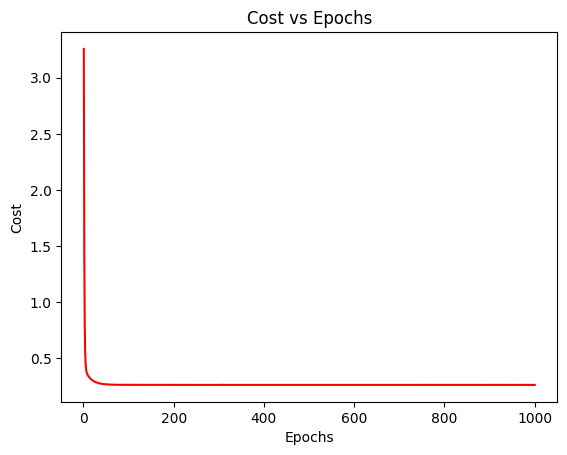

Cost after: 1.0562980582651587


In [ ]:
model = LinearRegression(inp_features=8,epochs=1000,alpha=1e-3,reg_param=0.05)
print(f"Cost before: {model._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after: {model._compute_cost(x_train, y_train)}")

(15000, 1)
(15000, 1)


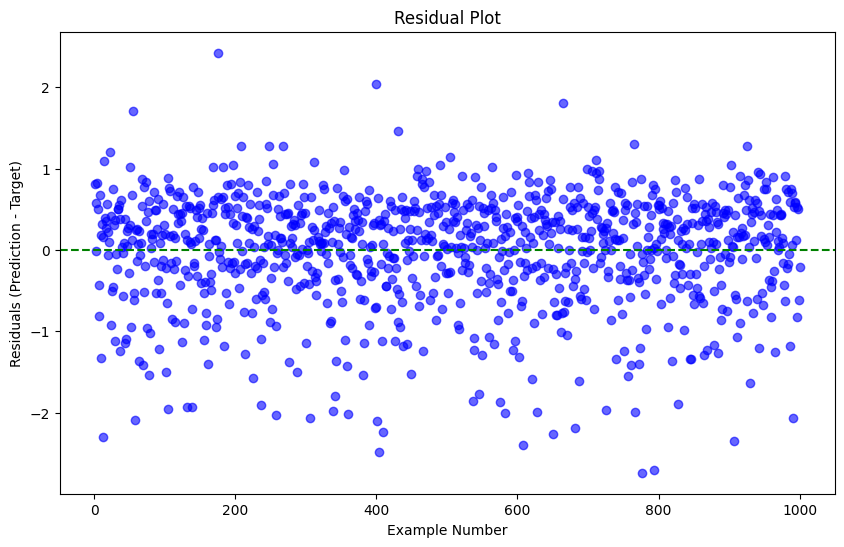

In [ ]:
predictions = model.predict(x_train)
print(predictions.shape)
residuals = predictions - y_train.reshape(x_train.shape[0],1)
print(residuals.shape)
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(1, 1001), residuals[0:1000], color='blue', alpha=0.6)
plt.axhline(0, color='green', linestyle='--')  # Line at 0 to indicate no residual error
plt.xlabel('Example Number')
plt.ylabel('Residuals (Prediction - Target)')
plt.title('Residual Plot')
plt.show()

In [4]:
indxs = np.random.permutation(X.shape[0])
X = X[indxs,:]
Y = Y[indxs]
print(X.shape)
split_indx = int(0.9*X.shape[0])
x_train, x_test = X[:split_indx,:], X[split_indx:,:]
y_train, y_test = Y[:split_indx], Y[split_indx:]

(48000, 25)


Streaming output truncated to the last 5000 lines.
Epoch: 5001, Cost: 58181.302445
Epoch: 5002, Cost: 58181.302445
Epoch: 5003, Cost: 58181.302445
Epoch: 5004, Cost: 58181.302445
Epoch: 5005, Cost: 58181.302445
Epoch: 5006, Cost: 58181.302445
Epoch: 5007, Cost: 58181.302445
Epoch: 5008, Cost: 58181.302445
Epoch: 5009, Cost: 58181.302445
Epoch: 5010, Cost: 58181.302445
Epoch: 5011, Cost: 58181.302445
Epoch: 5012, Cost: 58181.302445
Epoch: 5013, Cost: 58181.302445
Epoch: 5014, Cost: 58181.302445
Epoch: 5015, Cost: 58181.302445
Epoch: 5016, Cost: 58181.302445
Epoch: 5017, Cost: 58181.302445
Epoch: 5018, Cost: 58181.302445
Epoch: 5019, Cost: 58181.302445
Epoch: 5020, Cost: 58181.302445
Epoch: 5021, Cost: 58181.302445
Epoch: 5022, Cost: 58181.302445
Epoch: 5023, Cost: 58181.302445
Epoch: 5024, Cost: 58181.302445
Epoch: 5025, Cost: 58181.302445
Epoch: 5026, Cost: 58181.302445
Epoch: 5027, Cost: 58181.302445
Epoch: 5028, Cost: 58181.302445
Epoch: 5029, Cost: 58181.302445
Epoch: 5030, Cost: 58

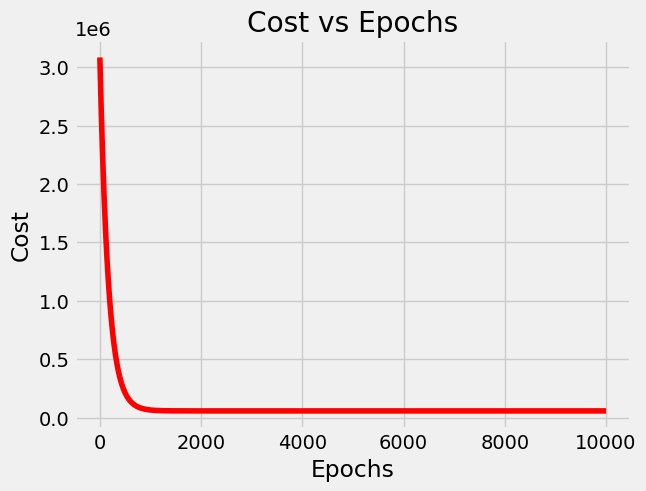

Cost after: 58181.30244435288


In [ ]:
model2 = LinearRegression(inp_features=25,epochs=10000,batch_size= 43200,alpha=3e-3,reg_param=0.5)
print(f"Cost before: {model2._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model2.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after: {model2._compute_cost(x_train, y_train)}")

In [8]:
model3 = LinearRegression(inp_features=25,epochs=10000,batch_size= 43200,alpha=3e-3)
print(f"Cost before: {model3._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model3.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after: {model3._compute_cost(x_train, y_train)}")

Cost before: 3108038.9603894935
Epoch: 001, Cost: 3089853.850874
Epoch: 002, Cost: 3071777.209184
Epoch: 003, Cost: 3053808.388093
Epoch: 004, Cost: 3035946.744240
Epoch: 005, Cost: 3018191.638103
Epoch: 006, Cost: 3000542.433977
Epoch: 007, Cost: 2982998.499954
Epoch: 008, Cost: 2965559.207896
Epoch: 009, Cost: 2948223.933414
Epoch: 010, Cost: 2930992.055849
Epoch: 011, Cost: 2913862.958244
Epoch: 012, Cost: 2896836.027327
Epoch: 013, Cost: 2879910.653484
Epoch: 014, Cost: 2863086.230743
Epoch: 015, Cost: 2846362.156747
Epoch: 016, Cost: 2829737.832735
Epoch: 017, Cost: 2813212.663520
Epoch: 018, Cost: 2796786.057469
Epoch: 019, Cost: 2780457.426479
Epoch: 020, Cost: 2764226.185958
Epoch: 021, Cost: 2748091.754804
Epoch: 022, Cost: 2732053.555382
Epoch: 023, Cost: 2716111.013508
Epoch: 024, Cost: 2700263.558422
Epoch: 025, Cost: 2684510.622772
Epoch: 026, Cost: 2668851.642594
Epoch: 027, Cost: 2653286.057288
Epoch: 028, Cost: 2637813.309603
Epoch: 029, Cost: 2622432.845611
Epoch: 030,

KeyboardInterrupt: 

Cost before: 3106167.9169074735
Epoch: 001, Cost: 59154.162214
Epoch: 002, Cost: 58070.002609
Epoch: 003, Cost: 58069.445049
Epoch: 004, Cost: 58096.622219
Epoch: 005, Cost: 58081.656668
Epoch: 006, Cost: 58072.199772
Epoch: 007, Cost: 58095.212724
Epoch: 008, Cost: 58083.047855
Epoch: 009, Cost: 58076.352426
Epoch: 010, Cost: 58068.883398
Epoch: 011, Cost: 58065.924522
Epoch: 012, Cost: 58074.587507
Epoch: 013, Cost: 58079.913427
Epoch: 014, Cost: 58086.456901
Epoch: 015, Cost: 58097.530303
Epoch: 016, Cost: 58073.565230
Epoch: 017, Cost: 58086.023137
Epoch: 018, Cost: 58071.500220
Epoch: 019, Cost: 58062.653575
Epoch: 020, Cost: 58075.765165
Epoch: 021, Cost: 58087.930270
Epoch: 022, Cost: 58066.326325
Epoch: 023, Cost: 58075.083968
Epoch: 024, Cost: 58079.593925
Epoch: 025, Cost: 58089.690719
Epoch: 026, Cost: 58070.225338
Epoch: 027, Cost: 58066.447514
Epoch: 028, Cost: 58071.803398
Epoch: 029, Cost: 58078.092160
Epoch: 030, Cost: 58084.853430
Epoch: 031, Cost: 58091.714990
Epoch: 

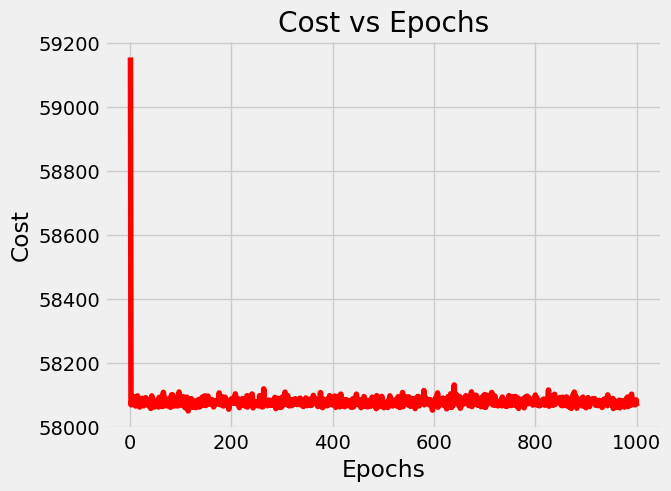

Cost after: 58066.0320264255


In [14]:
model4 = LinearRegression(inp_features=25,epochs=1000,batch_size= 32,alpha=3e-3)
print(f"Cost before: {model4._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model4.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after: {model4._compute_cost(x_train, y_train)}")

Cost before (cost doesnt include reg_param term): 3106785.389113337
Epoch: 001, Cost: 59089.704716
Epoch: 002, Cost: 58100.594873
Epoch: 003, Cost: 58089.755973
Epoch: 004, Cost: 58106.687329
Epoch: 005, Cost: 58118.392846
Epoch: 006, Cost: 58121.272039
Epoch: 007, Cost: 58105.894118
Epoch: 008, Cost: 58094.633212
Epoch: 009, Cost: 58117.705948
Epoch: 010, Cost: 58118.723823
Epoch: 011, Cost: 58091.838569
Epoch: 012, Cost: 58083.781145
Epoch: 013, Cost: 58119.346165
Epoch: 014, Cost: 58093.907202
Epoch: 015, Cost: 58105.754279
Epoch: 016, Cost: 58085.840830
Epoch: 017, Cost: 58099.295185
Epoch: 018, Cost: 58089.829544
Epoch: 019, Cost: 58105.777027
Epoch: 020, Cost: 58119.490111
Epoch: 021, Cost: 58109.581508
Epoch: 022, Cost: 58115.831458
Epoch: 023, Cost: 58099.023632
Epoch: 024, Cost: 58104.813476
Epoch: 025, Cost: 58090.188236
Epoch: 026, Cost: 58109.230412
Epoch: 027, Cost: 58101.768216
Epoch: 028, Cost: 58089.918082
Epoch: 029, Cost: 58088.430600
Epoch: 030, Cost: 58107.923769
Ep

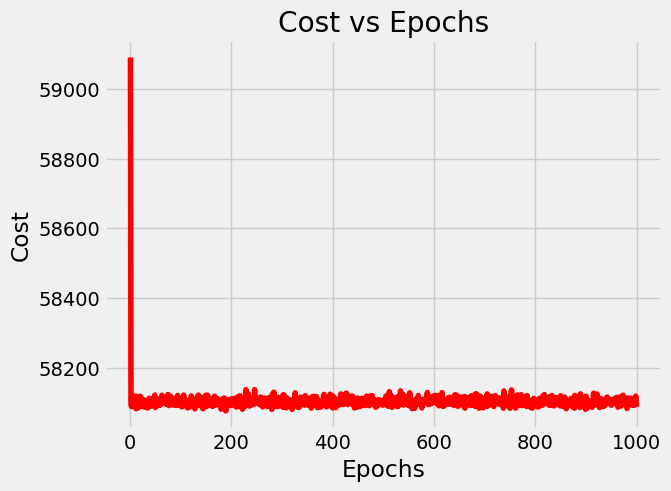

Cost after (cost doesnt include reg_param term): 58062.48369612893


In [15]:
model5 = LinearRegression(inp_features=25,epochs=1000,batch_size= 32,alpha=3e-3,reg_param=0.5)
print(f"Cost before (cost doesnt include reg_param term): {model5._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model5.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model5._compute_cost(x_train, y_train)}")

Cost before (cost doesnt include reg_param term): 3103741.301211189
Epoch: 001, Cost: 3085581.500600
Epoch: 002, Cost: 3067530.018819
Epoch: 003, Cost: 3049586.209524
Epoch: 004, Cost: 3031749.430227
Epoch: 005, Cost: 3014019.042271
Epoch: 006, Cost: 2996394.410814
Epoch: 007, Cost: 2978874.904803
Epoch: 008, Cost: 2961459.896953
Epoch: 009, Cost: 2944148.763722
Epoch: 010, Cost: 2926940.885290
Epoch: 011, Cost: 2909835.645538
Epoch: 012, Cost: 2892832.432025
Epoch: 013, Cost: 2875930.635965
Epoch: 014, Cost: 2859129.652206
Epoch: 015, Cost: 2842428.879208
Epoch: 016, Cost: 2825827.719024
Epoch: 017, Cost: 2809325.577274
Epoch: 018, Cost: 2792921.863126
Epoch: 019, Cost: 2776615.989276
Epoch: 020, Cost: 2760407.371926
Epoch: 021, Cost: 2744295.430760
Epoch: 022, Cost: 2728279.588931
Epoch: 023, Cost: 2712359.273030
Epoch: 024, Cost: 2696533.913074
Epoch: 025, Cost: 2680802.942481
Epoch: 026, Cost: 2665165.798052
Epoch: 027, Cost: 2649621.919950
Epoch: 028, Cost: 2634170.751677
Epoch: 0

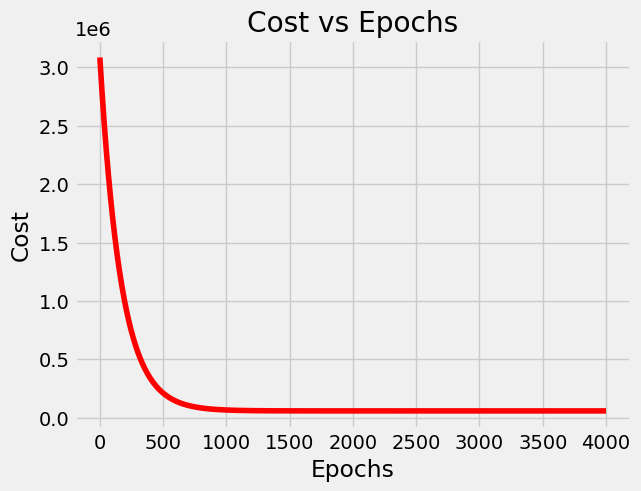

Cost after (cost doesnt include reg_param term): 58040.44266679417


In [16]:
model6 = LinearRegression(inp_features=25,epochs=4000,batch_size=x_train.shape[0],alpha=3e-3,reg_param=3e-3)
print(f"Cost before (cost doesnt include reg_param term): {model6._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model6.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model6._compute_cost(x_train, y_train)}")

Cost before (cost doesnt include reg_param term): 3105909.2457571607
Epoch: 001, Cost: 3087737.110406
Epoch: 002, Cost: 3069673.363862
Epoch: 003, Cost: 3051717.359382
Epoch: 004, Cost: 3033868.454083
Epoch: 005, Cost: 3016126.008917
Epoch: 006, Cost: 2998489.388654
Epoch: 007, Cost: 2980957.961853
Epoch: 008, Cost: 2963531.100844
Epoch: 009, Cost: 2946208.181702
Epoch: 010, Cost: 2928988.584228
Epoch: 011, Cost: 2911871.691924
Epoch: 012, Cost: 2894856.891973
Epoch: 013, Cost: 2877943.575215
Epoch: 014, Cost: 2861131.136126
Epoch: 015, Cost: 2844418.972796
Epoch: 016, Cost: 2827806.486911
Epoch: 017, Cost: 2811293.083724
Epoch: 018, Cost: 2794878.172040
Epoch: 019, Cost: 2778561.164195
Epoch: 020, Cost: 2762341.476028
Epoch: 021, Cost: 2746218.526870
Epoch: 022, Cost: 2730191.739514
Epoch: 023, Cost: 2714260.540201
Epoch: 024, Cost: 2698424.358595
Epoch: 025, Cost: 2682682.627765
Epoch: 026, Cost: 2667034.784164
Epoch: 027, Cost: 2651480.267609
Epoch: 028, Cost: 2636018.521260
Epoch: 

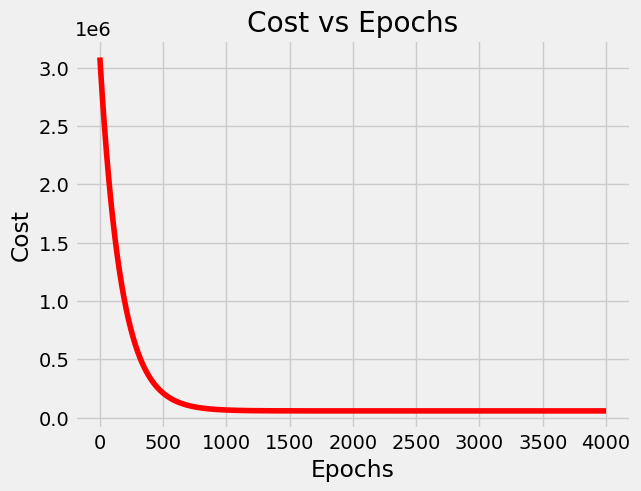

Cost after (cost doesnt include reg_param term): 58040.44265427056


In [17]:
model7 = LinearRegression(inp_features=25,epochs=4000,batch_size=x_train.shape[0],alpha=3e-3,reg_param=1e-3)
print(f"Cost before (cost doesnt include reg_param term): {model7._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model7.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model7._compute_cost(x_train, y_train)}")


Cost before (cost doesnt include reg_param term): 3108429.9868367543
Epoch: 001, Cost: 2928997.520487
Epoch: 002, Cost: 2760123.950010
Epoch: 003, Cost: 2601187.689679
Epoch: 004, Cost: 2451603.759335
Epoch: 005, Cost: 2310821.628053
Epoch: 006, Cost: 2178323.184661
Epoch: 007, Cost: 2053620.827862
Epoch: 008, Cost: 1936255.668920
Epoch: 009, Cost: 1825795.840261
Epoch: 010, Cost: 1721834.903746
Epoch: 011, Cost: 1623990.352751
Epoch: 012, Cost: 1531902.202513
Epoch: 013, Cost: 1445231.663538
Epoch: 014, Cost: 1363659.893185
Epoch: 015, Cost: 1286886.820807
Epoch: 016, Cost: 1214630.042116
Epoch: 017, Cost: 1146623.778700
Epoch: 018, Cost: 1082617.898836
Epoch: 019, Cost: 1022376.995998
Epoch: 020, Cost: 965679.521659
Epoch: 021, Cost: 912316.969178
Epoch: 022, Cost: 862093.105772
Epoch: 023, Cost: 814823.249732
Epoch: 024, Cost: 770333.590221
Epoch: 025, Cost: 728460.547135
Epoch: 026, Cost: 689050.168686
Epoch: 027, Cost: 651957.564459
Epoch: 028, Cost: 617046.371868
Epoch: 029, Cost

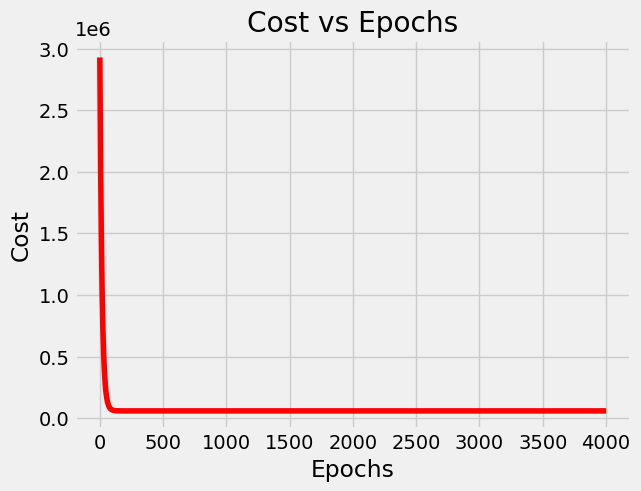

Cost after (cost doesnt include reg_param term): 58040.44374804026


In [18]:
model8 = LinearRegression(inp_features=25,epochs=2000,batch_size=x_train.shape[0],alpha=3e-2,reg_param=3e-1)
print(f"Cost before (cost doesnt include reg_param term): {model8._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model8.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model8._compute_cost(x_train, y_train)}")

Cost before (cost doesnt include reg_param term): 3107468.4434972005
Epoch: 001, Cost: 2928094.354962
Epoch: 002, Cost: 2759275.493933
Epoch: 003, Cost: 2600390.504118
Epoch: 004, Cost: 2450854.620637
Epoch: 005, Cost: 2310117.514415
Epoch: 006, Cost: 2177661.263532
Epoch: 007, Cost: 2052998.444139
Epoch: 008, Cost: 1935670.333865
Epoch: 009, Cost: 1825245.221117
Epoch: 010, Cost: 1721316.813998
Epoch: 011, Cost: 1623502.742991
Epoch: 012, Cost: 1531443.151873
Epoch: 013, Cost: 1444799.371660
Epoch: 014, Cost: 1363252.672688
Epoch: 015, Cost: 1286503.090226
Epoch: 016, Cost: 1214268.319280
Epoch: 017, Cost: 1146282.674520
Epoch: 018, Cost: 1082296.111483
Epoch: 019, Cost: 1022073.305447
Epoch: 020, Cost: 965392.784563
Epoch: 021, Cost: 912046.114074
Epoch: 022, Cost: 861837.128579
Epoch: 023, Cost: 814581.209529
Epoch: 024, Cost: 770104.605292
Epoch: 025, Cost: 728243.791261
Epoch: 026, Cost: 688844.867665
Epoch: 027, Cost: 651762.992845
Epoch: 028, Cost: 616861.849918
Epoch: 029, Cost

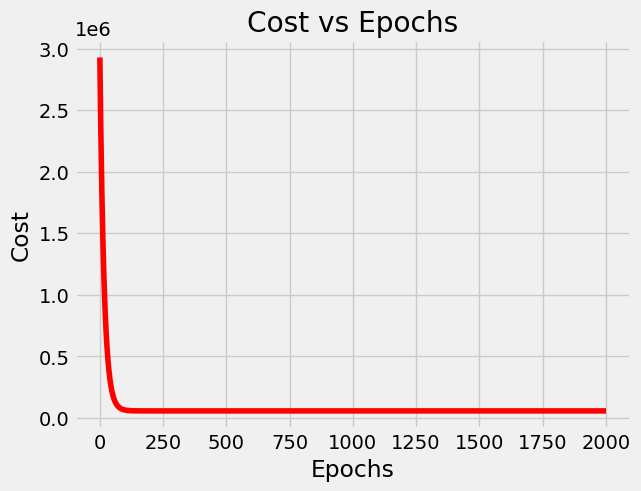

Cost after (cost doesnt include reg_param term): 58040.442624557494


In [20]:
model9 = LinearRegression(inp_features=25,epochs=2000,batch_size=x_train.shape[0],alpha=3e-2,reg_param=3e-1)
print(f"Cost before (cost doesnt include reg_param term): {model9._compute_cost(x_train, y_train)}")
J_history_batches, J_history_entire = model9.train(x_train, y_train, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model9._compute_cost(x_train, y_train)}")

Cost before (cost doesnt include reg_param term): 3105609.8205703106
Epoch: 001, Cost: 3087456.652429
Epoch: 002, Cost: 3069411.649163
Epoch: 003, Cost: 3051474.166073
Epoch: 004, Cost: 3033643.562302
Epoch: 005, Cost: 3015919.200812
Epoch: 006, Cost: 2998300.448365
Epoch: 007, Cost: 2980786.675499
Epoch: 008, Cost: 2963377.256503
Epoch: 009, Cost: 2946071.569399
Epoch: 010, Cost: 2928868.995916
Epoch: 011, Cost: 2911768.921468
Epoch: 012, Cost: 2894770.735137
Epoch: 013, Cost: 2877873.829643
Epoch: 014, Cost: 2861077.601330
Epoch: 015, Cost: 2844381.450140
Epoch: 016, Cost: 2827784.779591
Epoch: 017, Cost: 2811286.996761
Epoch: 018, Cost: 2794887.512260
Epoch: 019, Cost: 2778585.740213
Epoch: 020, Cost: 2762381.098237
Epoch: 021, Cost: 2746273.007423
Epoch: 022, Cost: 2730260.892314
Epoch: 023, Cost: 2714344.180880
Epoch: 024, Cost: 2698522.304506
Epoch: 025, Cost: 2682794.697964
Epoch: 026, Cost: 2667160.799398
Epoch: 027, Cost: 2651620.050300
Epoch: 028, Cost: 2636171.895493
Epoch: 

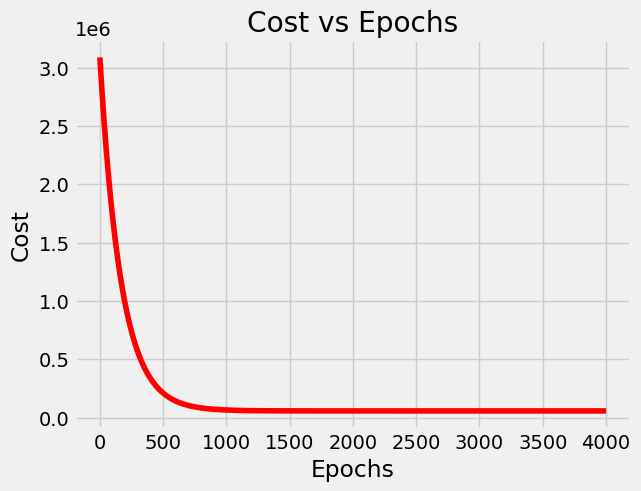

Cost after (cost doesnt include reg_param term): 58027.40038523598


In [21]:
model10 = LinearRegression(inp_features=25,epochs=4000,batch_size=X.shape[0],alpha=3e-3,reg_param=3e-3)
print(f"Cost before (cost doesnt include reg_param term): {model10._compute_cost(X, Y)}")
J_history_batches, J_history_entire = model10.train(X, Y, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model10._compute_cost(X, Y)}")

In [ ]:
model10 = LinearRegression(inp_features=25,epochs=4000,batch_size=X.shape[0],alpha=3e-3,reg_param=3e-3)
print(f"Cost before (cost doesnt include reg_param term): {model10._compute_cost(X, Y)}")
J_history_batches, J_history_entire = model10.train(X, Y, details = False, plot_costs=True)
print(f"Cost after (cost doesnt include reg_param term): {model10._compute_cost(X, Y)}")

In [23]:
class LinearRegression:
    def __init__(self,inp_features, alpha=1e-3, reg_param=None, batch_size=32,epochs=100):
        self.epochs = epochs
        self.inp_features = inp_features
        self.alpha = alpha
        self.reg_param = reg_param
        self.cost_func = self._compute_cost if self.reg_param is None else self._compute_cost_reg
        self.W = None
        self.B = None
        self._init_params()
        self.batch_size = batch_size
    def _init_params(self):
        self.W = np.random.randn(1,self.inp_features)
        self.B = 0.0
    def _compute_cost(self,X,Y):
        m = X.shape[0]
        predictions = self.predict(X)
        cost = np.mean((predictions - Y)**2) / 2
        return cost
    def _compute_cost_reg(self, X, Y):
        m = X.shape[0]
        predictions = self.predict(X)
        cost = np.mean((predictions - Y)**2) / 2
        cost += (self.reg_param*np.sum(self.W**2))/(2*m)
        return cost
    def _get_grads(self,X,Y):
        predictions = self.predict(X)
        err = predictions - Y
        dj_dw = np.mean(err * X, axis = 0)
        dj_dw = dj_dw.reshape(self.W.shape)
        dj_db = np.mean(err)
        return dj_dw, dj_db
    def train(self,X,Y,details=True,plot_costs=True):
        m = X.shape[0]
        Y = Y.reshape((m,1))
        J_history_batches = []
        J_hist_ep = []
        for epoch in range(1,self.epochs+1):
            indxs = np.random.permutation(m)
            X_shuffled = X[indxs,:]
            Y_shuffled = Y[indxs,:]
            batches = m // self.batch_size
            for k in range(batches):
                mini_batch_X = X_shuffled[k*self.batch_size:(k+1)*self.batch_size,:]
                mini_batch_Y = Y_shuffled[k*self.batch_size: (k+1)*self.batch_size,:]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                # cost = self._compute_cost(mini_batch_X, mini_batch_Y) if self.reg_param is None else self._compute_cost_reg(mini_batch_X, mini_batch_Y)
                cost = self.cost_func(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: {k+1}/{batches}, Cost: {cost:.6f}")

            if m%batches != 0:
                mini_batch_X = X_shuffled[batches*self.batch_size:,:]
                mini_batch_Y = Y_shuffled[batches*self.batch_size]
                dj_dw, dj_db = self._get_grads(mini_batch_X, mini_batch_Y)
                self.W -= self.alpha*dj_dw
                self.B -= self.alpha*dj_db
                if self.reg_param is None:
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                else:
                  self.W = self.W*(1-self.alpha*self.reg_param/m)
                  self.W -= self.alpha*dj_dw
                  self.B -= self.alpha*dj_db
                # cost = self._compute_cost(mini_batch_X, mini_batch_Y) if self.reg_param is None else self._compute_cost_reg(mini_batch_X, mini_batch_Y)
                cost = self.cost_func(mini_batch_X, mini_batch_Y)
                J_history_batches.append(cost)
                if details:
                    print(f"Epoch: {epoch:03d}, Batch: last, Cost: {cost:.6f}")
            # cost = self._compute_cost(X_shuffled, Y_shuffled) if self.reg_param is None else self._compute_cost_reg(X_shuffled, Y_shuffled)
            cost = self.cost_func(X_shuffled, Y_shuffled)
            J_hist_ep.append(cost)
            print(f"Epoch: {epoch:03d}, Cost: {cost:.6f}")
        self._plotter(J_hist_ep) if plot_costs else None
        return J_history_batches, J_hist_ep

    def k_fold_cv(self, X, Y, k=5,details=True,plot_cost_vs_epoch=True,plot_cost_vs_fold=True,retrain=True,plot_r2_vs_fold=True):
        m = X.shape[0]
        indxs = np.random.permutation(m)
        X_shuffled = X[indxs,:]
        Y_shuffled = Y[indxs]
        Y_shuffled = Y_shuffled.reshape((m,1))
        fold_size = m //k
        train_costs = []
        test_costs = []
        train_r2s = []
        test_r2s = []
        mean_of_train_costs = 0.0
        mean_of_test_costs = 0.0
        if plot_cost_vs_epoch:
            J_hist_list = []
        for i in range(k):
            print(f"Working on fold {i+1}...:")
            test_start = fold_size*i
            test_end = fold_size*(i+1) if i<k-1 else m
            x_train = np.concatenate((X_shuffled[:test_start,:], X_shuffled[test_end:,:]), axis = 0)
            y_train = np.concatenate((Y_shuffled[:test_start,:], Y_shuffled[test_end:,:]), axis = 0)
            x_test = X_shuffled[test_start:test_end,:]
            y_test = Y_shuffled[test_start:test_end,:]
            self._init_params()
            useless, J_hist = self.train(x_train,y_train,details=details, plot_costs=False)
            if plot_cost_vs_epoch:
                J_hist_list.append(J_hist)
            training_cost = self._compute_cost(x_train, y_train)
            mean_of_train_costs += (training_cost/k)
            testing_cost = self._compute_cost(x_test,y_test)
            mean_of_test_costs += (testing_cost/k)
            train_r2 = self.R2_score(x_train, y_train)
            test_r2 = self.R2_score(x_test,y_test)
            train_r2s.append(train_r2)
            test_r2s.append(test_r2)
            train_costs.append(training_cost)
            test_costs.append(testing_cost)
            print(f"Training cost for fold {i+1} is {training_cost}")
            print(f"Training R2 score for fold {i+1} is {train_r2}")
            print(f"Testing cost for fold {i+1} is {testing_cost}")
            print(f"Testing R2 score for fold {i+1} is {test_r2}")
            print(f"Fold {i+1} completed")
            print(f"Starting fold {i+2}") if i<k-1 else None
        # mean_of_training_costs = np.mean(training_costs)
        print(f"Mean of Training Costs: {mean_of_train_costs}")
        # mean_of_testing_costs = np.mean(testing_costs)
        print(f"Mean of Testing Costs: {mean_of_test_costs}")
        #Plotting:
        if plot_cost_vs_epoch:
            for i in range(k):
                plt.plot(np.arange(1,len(J_hist_list[i])+1), np.array(J_hist_list[i]),c='r',label='Costs')
                plt.title(f"Cost vs Epoch for fold {i+1}")
                plt.xlabel("Epoch")
                plt.ylabel("Cost")
                plt.legend()
                plt.show()

        if plot_cost_vs_fold:
            plt.plot(np.arange(1,k+1), train_costs, c='r', label='Training costs')
            plt.plot(np.arange(1,k+1), test_costs, c='b', label='Testing Costs')
            plt.xlabel('Fold')
            plt.ylabel("Cost")
            plt.legend()
            plt.show()
        if plot_r2_vs_fold:
            plt.plot(np.arange(1,k+1), train_r2s, c='r', label='Training R2 score')
            plt.plot(np.arange(1,k+1), test_r2s, c='b', label='Testing R2 score')
            plt.xlabel('Fold')
            plt.ylabel("R2 score")
            plt.legend()
            plt.show()
        if retrain:
            print("Retraining model...")
            self.train(X, Y, details=details, plot_costs=True)
            print("Retraining Complete")

        return train_costs,test_costs, train_r2s, test_r2s
    def _plotter(self, J_hist):
        plt.plot(np.arange(1,len(J_hist)+1), J_hist, c='r')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title("Cost vs Epochs")
        plt.show()
    def predict(self, X):
        return np.dot(X, self.W.T) + self.B

    def R2_score(self, X, Y):
        predictions = self.predict(X)
        SS_res = np.sum((Y-predictions)**2)
        Ybar = np.mean(Y)
        SS_tot = np.sum((Y-Ybar)**2)
        R2 = 1-(SS_res/SS_tot)
        return R2
    def residual_plot(self, X, Y):
        # m = np.maximum(X.shape[0],1000)
        predictions = self.predict(X)
        residuals = predictions - Y
        plt.scatter(np.arange(1,X.shape[0]+1), residuals, color='blue', alpha = 0.4)
        plt.axhline(0, color='green', linestyle='--')
        plt.xlabel("Examples")
        plt.ylabel("Residual (y_hat - y)")
        plt.title("Residual plot")
        plt.legend()
        plt.show()

    def histogram_plot(self, X, Y):
        # m = np.maximum(X.shape[0],1000)
        predictions = self.predict(X)
        residuals = predictions - Y
        plt.hist(residuals, bins=20,density=True,color='skyblue',edgecolor='black',alpha=0.6)
        plt.xlabel("Residuals (y_hat - y)")
        plt.ylabel("Frequency")
        plt.title("Histogram Plot")
        plt.axvline(0,color='r',linestyle='--')
        plt.legend()
        plt.show()

Working on fold 1...:
Epoch: 001, Cost: 1300782.199737
Epoch: 002, Cost: 565843.196316
Epoch: 003, Cost: 265768.199808
Epoch: 004, Cost: 143138.498730
Epoch: 005, Cost: 92962.041124
Epoch: 006, Cost: 72450.481833
Epoch: 007, Cost: 64058.626760
Epoch: 008, Cost: 60620.590317
Epoch: 009, Cost: 59212.628191
Epoch: 010, Cost: 58628.000758
Epoch: 011, Cost: 58394.009985
Epoch: 012, Cost: 58297.782473
Epoch: 013, Cost: 58259.365627
Epoch: 014, Cost: 58243.180337
Epoch: 015, Cost: 58236.147769
Epoch: 016, Cost: 58233.415103
Epoch: 017, Cost: 58232.335253
Epoch: 018, Cost: 58231.975997
Epoch: 019, Cost: 58231.717058
Epoch: 020, Cost: 58231.624274
Epoch: 021, Cost: 58231.564013
Epoch: 022, Cost: 58231.534260
Epoch: 023, Cost: 58231.585156
Epoch: 024, Cost: 58231.528613
Epoch: 025, Cost: 58231.541581
Epoch: 026, Cost: 58231.538048
Epoch: 027, Cost: 58231.459300
Epoch: 028, Cost: 58231.507555
Epoch: 029, Cost: 58231.570254
Epoch: 030, Cost: 58231.575376
Epoch: 031, Cost: 58231.531802
Epoch: 032, 

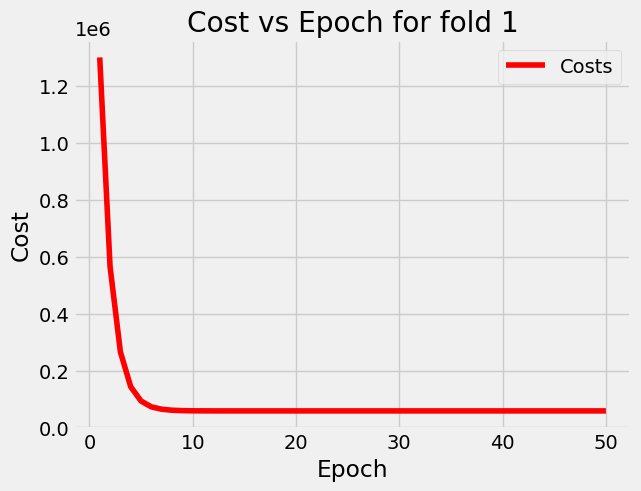

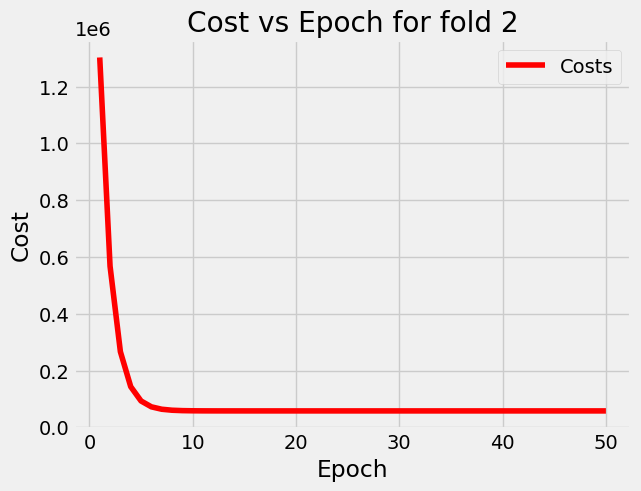

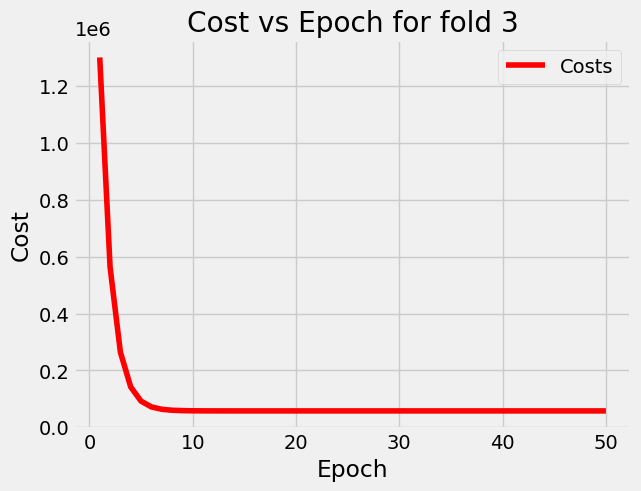

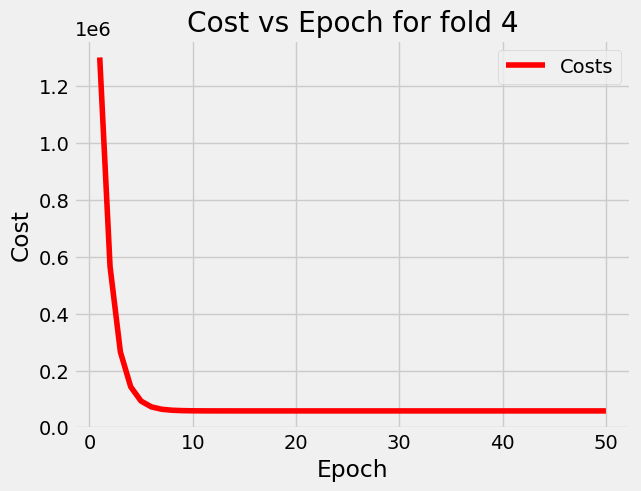

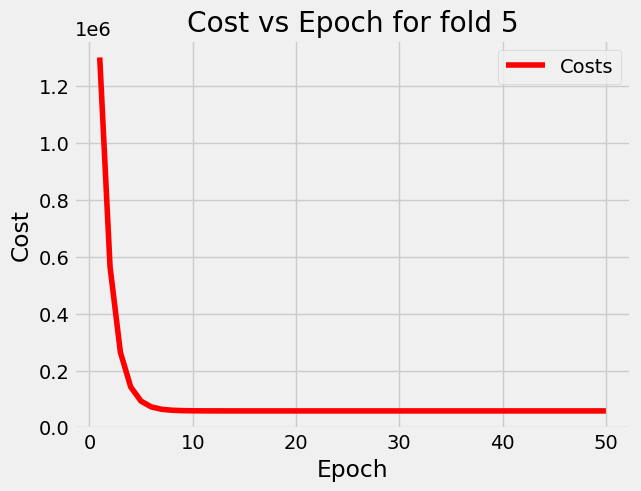

KeyboardInterrupt: 

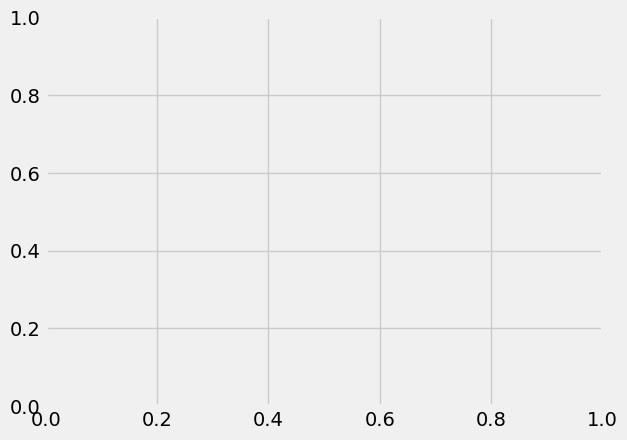

In [9]:
model11 = LinearRegression(inp_features=25,epochs=50,batch_size=256,alpha=3e-3,reg_param=3e-3)
model11.k_fold_cv(X,Y,k=5,details=False,plot_cost_vs_epoch=True,plot_cost_vs_fold=True,retrain=False)

Epoch: 001, Cost: 1171033.144341
Epoch: 002, Cost: 465943.064885
Epoch: 003, Cost: 214584.395863
Epoch: 004, Cost: 115838.169733
Epoch: 005, Cost: 82013.292659
Epoch: 006, Cost: 68550.913836
Epoch: 007, Cost: 62588.420376
Epoch: 008, Cost: 60920.611972
Epoch: 009, Cost: 59819.124615
Epoch: 010, Cost: 59652.229923
Epoch: 011, Cost: 59168.560685
Epoch: 012, Cost: 58630.414655
Epoch: 013, Cost: 58719.850459
Epoch: 014, Cost: 58651.117793
Epoch: 015, Cost: 58583.296177
Epoch: 016, Cost: 58562.939612
Epoch: 017, Cost: 58592.643187
Epoch: 018, Cost: 58573.315900
Epoch: 019, Cost: 58584.853587
Epoch: 020, Cost: 58661.642660
Epoch: 021, Cost: 58601.808369
Epoch: 022, Cost: 58872.303966
Epoch: 023, Cost: 58879.741222
Epoch: 024, Cost: 58680.355538
Epoch: 025, Cost: 58557.806509
Epoch: 026, Cost: 58537.198916
Epoch: 027, Cost: 58620.378484
Epoch: 028, Cost: 59054.138609
Epoch: 029, Cost: 58698.225372
Epoch: 030, Cost: 58979.055812
Epoch: 031, Cost: 58615.074643
Epoch: 032, Cost: 58643.191065
Epo

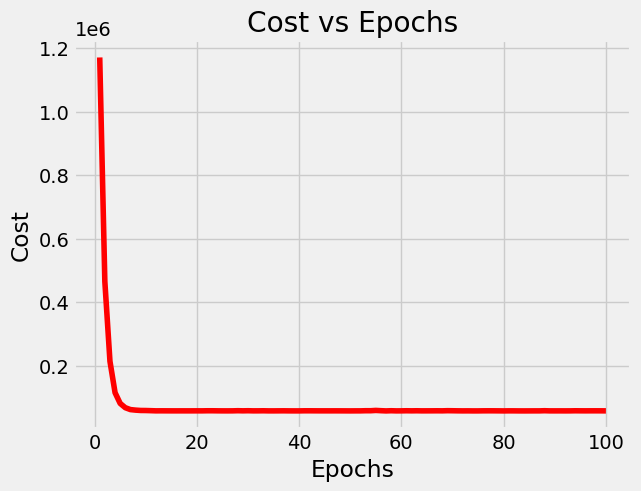

HIst for training: 


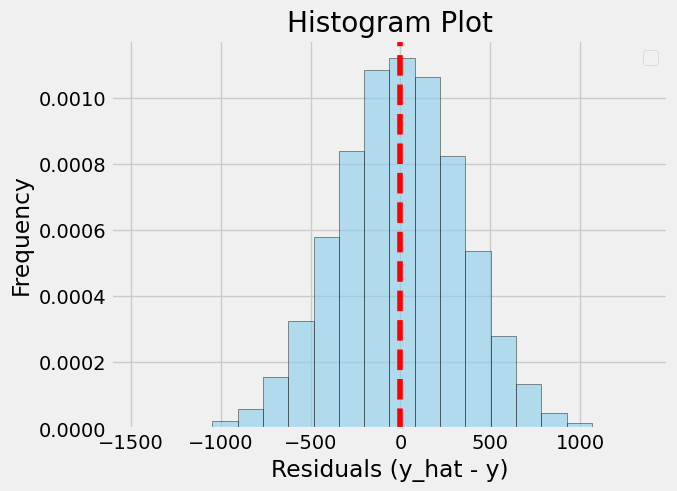

hist for testing: 


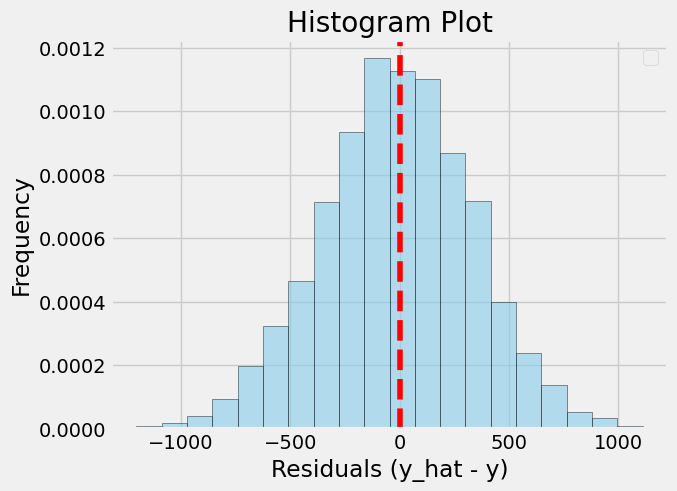

R2 error for training: 0.9748615153122527
R2 error for testing: 0.9745757597906731


In [20]:
model12 = LinearRegression(inp_features=25,epochs=100,batch_size=256,alpha=3e-3,reg_param=3e-3)
model12.train(x_train, y_train, details = False, plot_costs=True)
print("HIst for training: ")
model12.histogram_plot(x_train,y_train)
print("hist for testing: ")
model12.histogram_plot(x_test,y_test)
print(f"R2 error for training: {model12.R2_score(x_train,y_train)}")
print(f"R2 error for testing: {model12.R2_score(x_test,y_test)}")

Working on fold 1...:
Epoch: 001, Cost: 1301615.071694
Epoch: 002, Cost: 562180.226167
Epoch: 003, Cost: 262465.559571
Epoch: 004, Cost: 140926.958868
Epoch: 005, Cost: 91555.023164
Epoch: 006, Cost: 71533.964170
Epoch: 007, Cost: 63415.119644
Epoch: 008, Cost: 60117.603108
Epoch: 009, Cost: 58780.795907
Epoch: 010, Cost: 58236.003409
Epoch: 011, Cost: 58019.270449
Epoch: 012, Cost: 57931.823594
Epoch: 013, Cost: 57896.602085
Epoch: 014, Cost: 57882.340104
Epoch: 015, Cost: 57875.920449
Epoch: 016, Cost: 57873.829501
Epoch: 017, Cost: 57872.909382
Epoch: 018, Cost: 57872.460825
Epoch: 019, Cost: 57872.263992
Epoch: 020, Cost: 57872.345267
Epoch: 021, Cost: 57872.282756
Epoch: 022, Cost: 57872.269898
Epoch: 023, Cost: 57872.197922
Epoch: 024, Cost: 57872.256912
Epoch: 025, Cost: 57872.321624
Epoch: 026, Cost: 57872.304680
Epoch: 027, Cost: 57872.264235
Epoch: 028, Cost: 57872.268451
Epoch: 029, Cost: 57872.324872
Epoch: 030, Cost: 57872.321502
Epoch: 031, Cost: 57872.290381
Epoch: 032, 

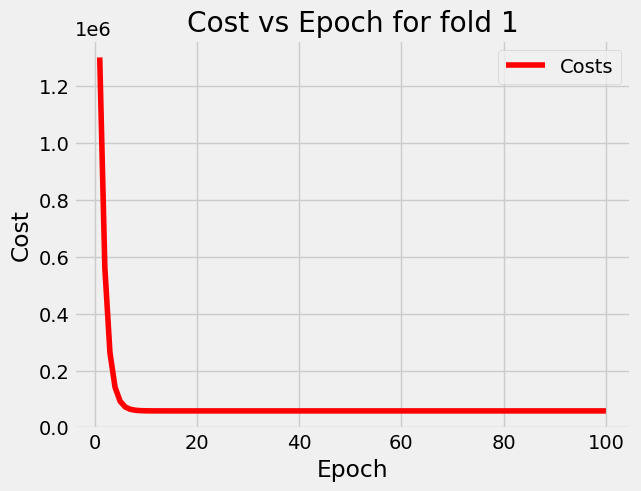

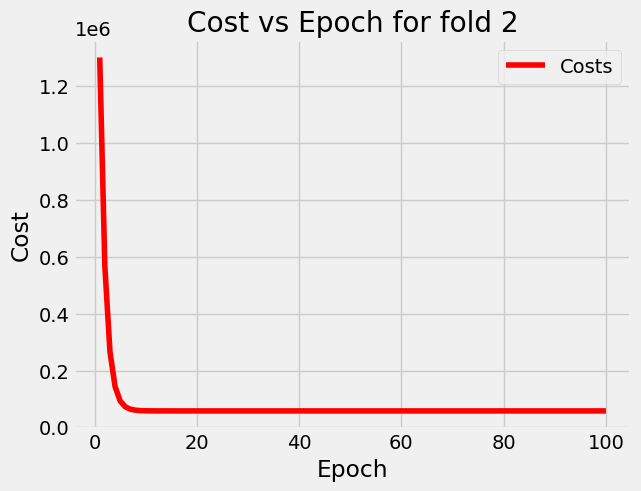

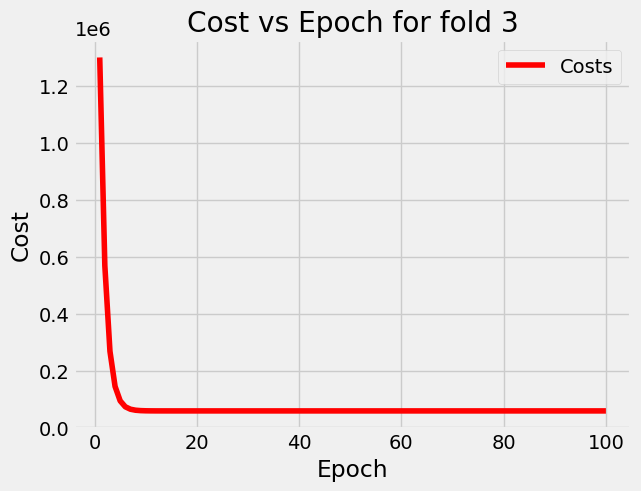

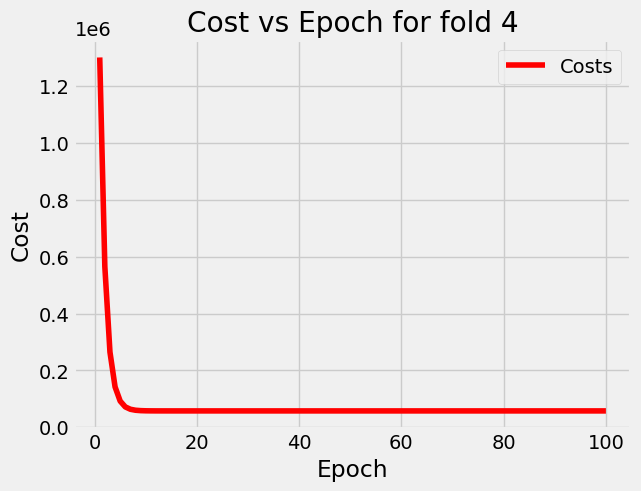

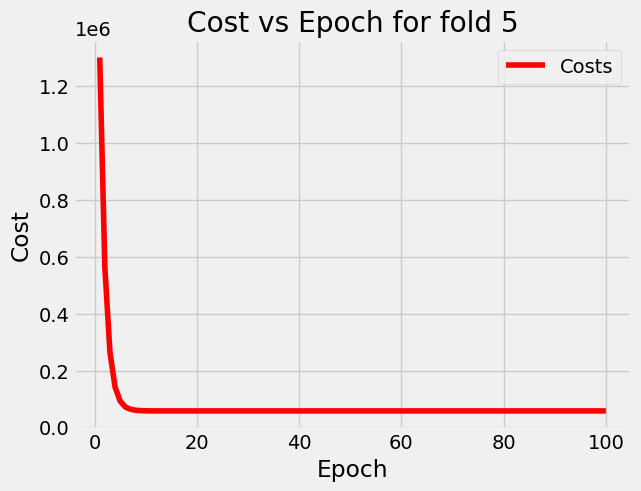

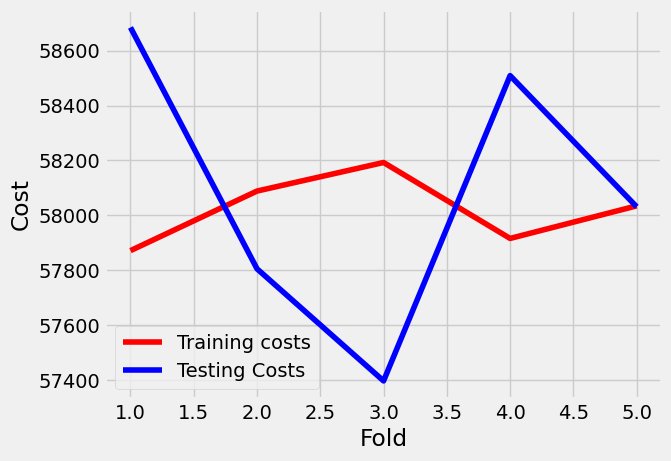

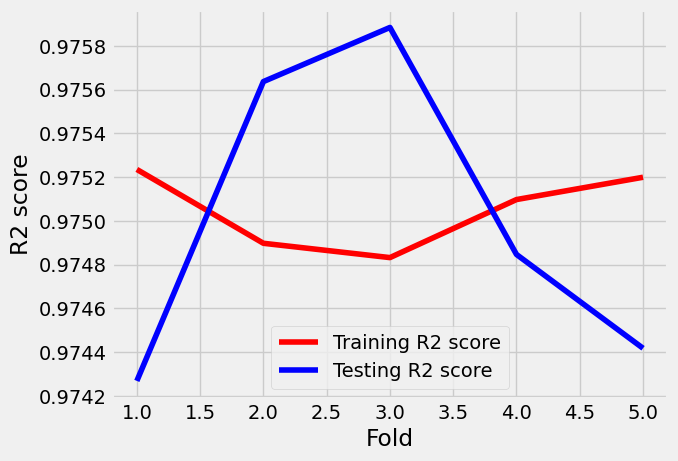

After this K fold CV, training again on the training dataset
Epoch: 001, Cost: 1176312.494204
Epoch: 002, Cost: 479074.949932
Epoch: 003, Cost: 217950.102961
Epoch: 004, Cost: 119871.699665
Epoch: 005, Cost: 81687.335382
Epoch: 006, Cost: 68411.976399
Epoch: 007, Cost: 62049.237822
Epoch: 008, Cost: 60264.781181
Epoch: 009, Cost: 59498.361955
Epoch: 010, Cost: 59064.491371
Epoch: 011, Cost: 58930.572873
Epoch: 012, Cost: 58912.978676
Epoch: 013, Cost: 58695.275447
Epoch: 014, Cost: 58638.113571
Epoch: 015, Cost: 58615.424492
Epoch: 016, Cost: 58780.835969
Epoch: 017, Cost: 58742.192081
Epoch: 018, Cost: 58597.828182
Epoch: 019, Cost: 58474.754906
Epoch: 020, Cost: 58784.710246
Epoch: 021, Cost: 58517.430882
Epoch: 022, Cost: 58557.188875
Epoch: 023, Cost: 58585.484458
Epoch: 024, Cost: 58526.216065
Epoch: 025, Cost: 58536.639633
Epoch: 026, Cost: 58447.522321
Epoch: 027, Cost: 58577.486409
Epoch: 028, Cost: 58512.616966
Epoch: 029, Cost: 58493.859625
Epoch: 030, Cost: 58861.336700
Epoc

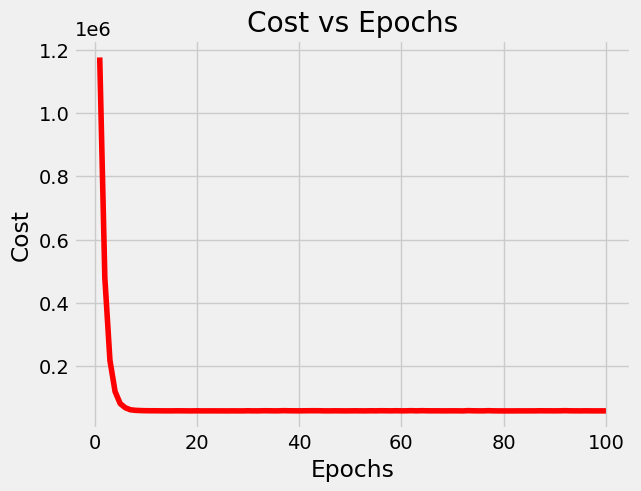

HIst for training: 


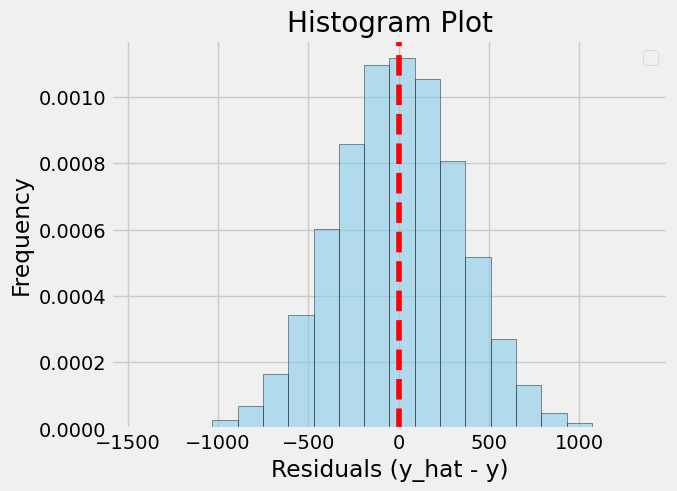

hist for testing: 


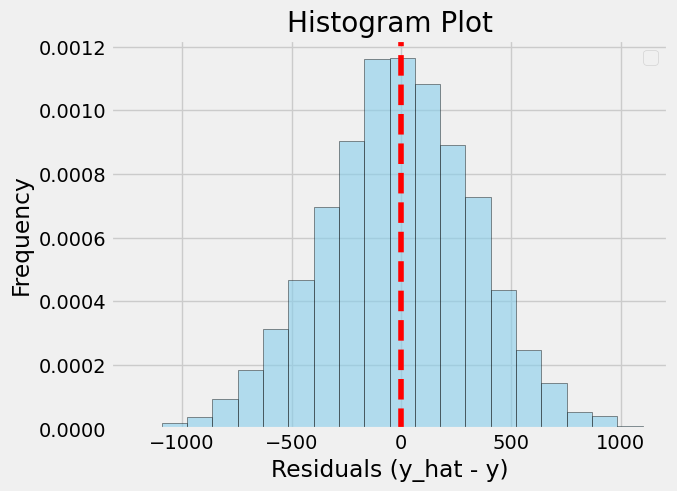

R2 error for training: 0.9748865005070485
R2 error for testing: 0.974582949018275


In [25]:
model13 = LinearRegression(inp_features=25,epochs=100,batch_size=256,alpha=3e-3,reg_param=3e-3)
model13.k_fold_cv(X,Y,details=False,plot_cost_vs_epoch=True,plot_cost_vs_fold=True,retrain=False,plot_r2_vs_fold=True)
print("After this K fold CV, training again on the training dataset")
model13._init_params()
model13.train(x_train, y_train, details = False, plot_costs=True)
print("HIst for training: ")
model13.histogram_plot(x_train,y_train)
print("hist for testing: ")
model13.histogram_plot(x_test,y_test)
print(f"R2 error for training: {model13.R2_score(x_train,y_train)}")
print(f"R2 error for testing: {model13.R2_score(x_test,y_test)}")

Epoch: 001, Cost: 3082457.647149
Epoch: 002, Cost: 3064442.700850
Epoch: 003, Cost: 3046535.093936
Epoch: 004, Cost: 3028734.186639
Epoch: 005, Cost: 3011039.343002
Epoch: 006, Cost: 2993449.930862
Epoch: 007, Cost: 2975965.321826
Epoch: 008, Cost: 2958584.891244
Epoch: 009, Cost: 2941308.018193
Epoch: 010, Cost: 2924134.085452
Epoch: 011, Cost: 2907062.479479
Epoch: 012, Cost: 2890092.590390
Epoch: 013, Cost: 2873223.811938
Epoch: 014, Cost: 2856455.541489
Epoch: 015, Cost: 2839787.180003
Epoch: 016, Cost: 2823218.132012
Epoch: 017, Cost: 2806747.805598
Epoch: 018, Cost: 2790375.612370
Epoch: 019, Cost: 2774100.967448
Epoch: 020, Cost: 2757923.289436
Epoch: 021, Cost: 2741842.000408
Epoch: 022, Cost: 2725856.525881
Epoch: 023, Cost: 2709966.294796
Epoch: 024, Cost: 2694170.739502
Epoch: 025, Cost: 2678469.295730
Epoch: 026, Cost: 2662861.402574
Epoch: 027, Cost: 2647346.502476
Epoch: 028, Cost: 2631924.041199
Epoch: 029, Cost: 2616593.467811
Epoch: 030, Cost: 2601354.234664
Epoch: 031

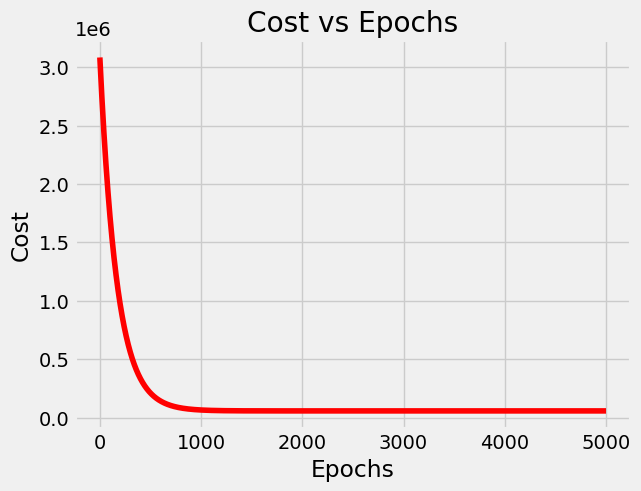

Hist for training: 


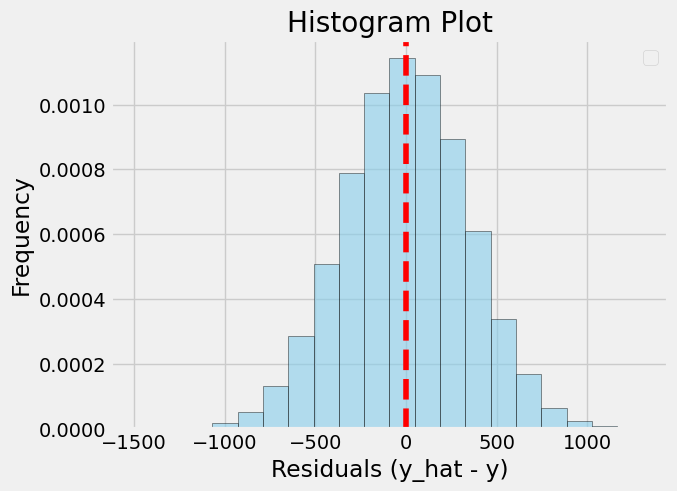

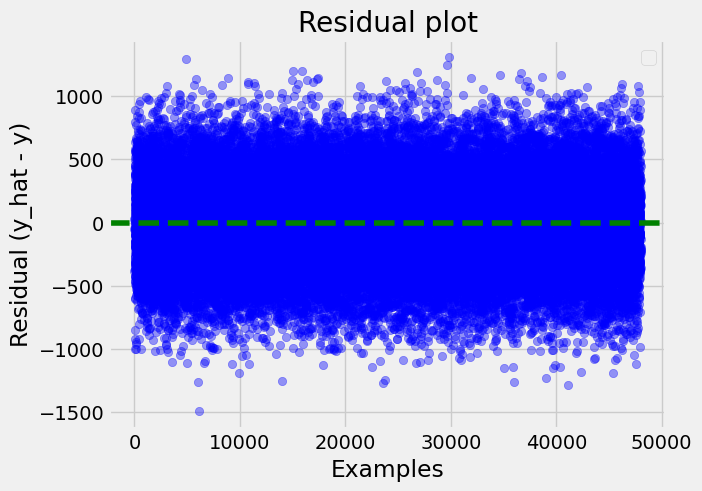

In [33]:
model14 = LinearRegression(inp_features=25,epochs=5000,batch_size=X.shape[0],alpha=3e-3,reg_param=3e-3)
model14._init_params()
model14.train(X, Y, details = False, plot_costs=True)
print("Hist for training: ")
model14.histogram_plot(X,Y)
model14.residual_plot(X,Y)